# MEMS 1029 - Project 1 - 1 Shaft and Spur Gear Design
**Group 12**.   

Ziang Cao: ZIC25@pitt.edu  
Mingze Cai: mic179@pitt.edu  
Yoosup Shin: yos34@pitt.edu  
Puhang Cai: puc4@pitt.edu  
Yuming Gu: yug52@pitt.edu  


University of Pittsburgh

# All the Dimensions?


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math
# Known
Power = 1.05  # KW
n_revPerMin = 2000
pi = math.pi

In [2]:
# KHK MSGA1.5-60, Module 1.5, 60 Tooth, Ground Alloy Steel Spur Gears
Bore_spurgear = 20  # mm
length_spurgear = 25  #mm
OD_spurgear = 90  # mm
OD_paddle = 180   # mm
Angle_pressure = 20 # degree
"""------------------------------------"""
# Will be determined later
R_spur = 0  # kN
Torque_spur_Nm = 0  # N.m

In [3]:
# Bearing
Bore_bearing = 12  # mm
length_bearing = 8  # mm

"""------------------------------------"""
R_Bearing = 0 # kN

In [4]:
# Shaft Deminsion in mm

dis_Component = 45   # mm

AB = dis_Component + length_bearing/2
BC = dis_Component + length_bearing/2 + length_spurgear/2
CD = BC
DE = AB

AE = AB + BC + CD + DE

# Spur Gear Design

Refer to Example 13-7 for the following analysis.

In [5]:
H = Power
d = OD_spurgear
n = n_revPerMin
theta = Angle_pressure

tan = np.tan(np.radians(theta))
cos = np.cos(np.radians(theta))

As we have one driven spur gear and two idler paddel gear, the tangential force between each pair of gears are the half of the total W_t.


In [6]:
# The overall tangiential force on the spur gear
Wt = (6e4*H)/(pi*d*n) # Equation 13-36

## Between each pair of spur gear and one paddle gear
Ft = Wt/2
Fr = Ft*tan
# F_total = math.sqrt(pow(Fr, 2) + pow(Ft, 2))
F_total = Ft/cos

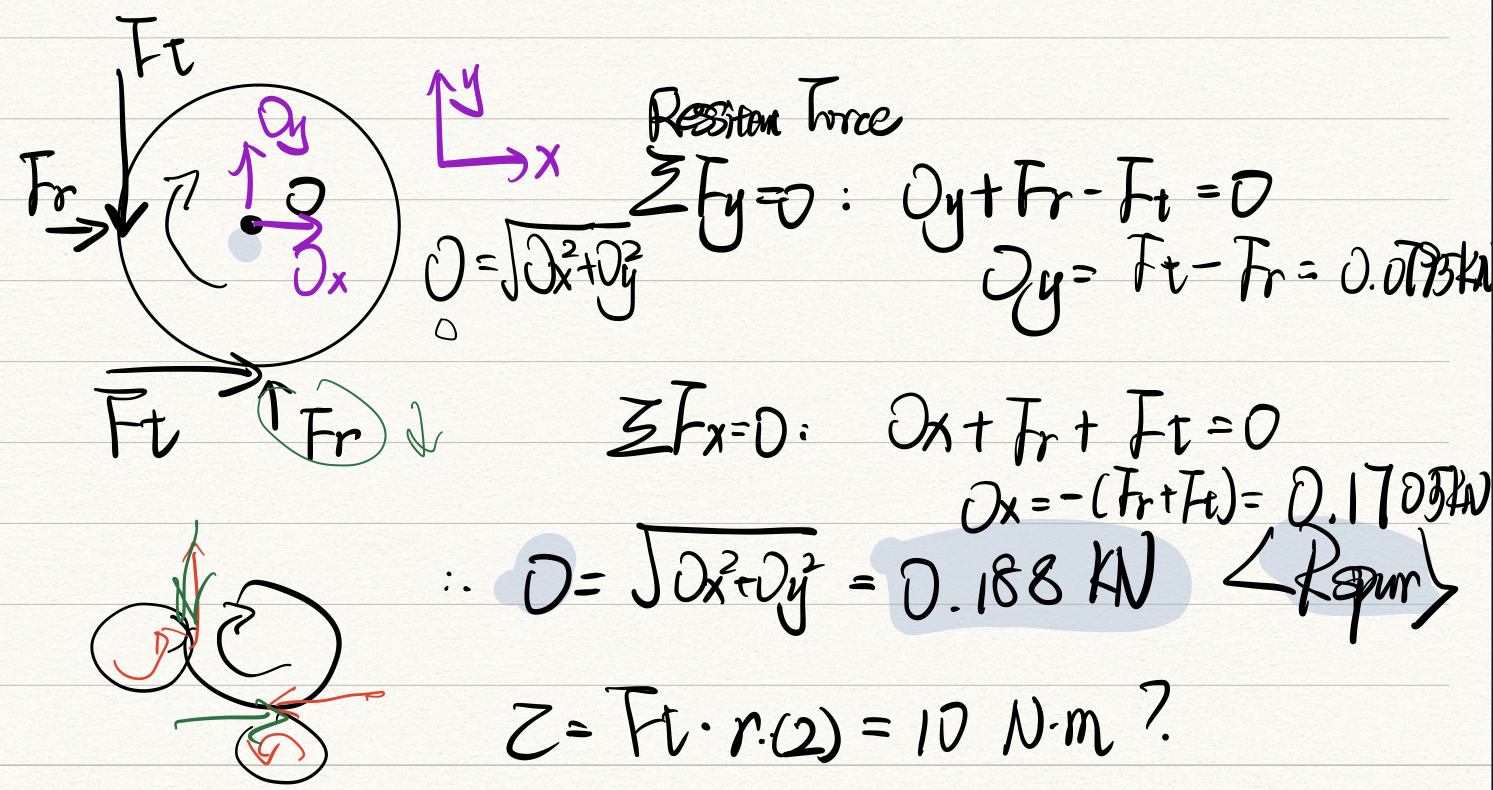Follow the image

In [7]:
Oy = Ft-Fr
Ox = -(Fr+Ft)
O_total = math.sqrt(pow(Ox, 2) + pow(Oy, 2))
R_spur = O_total
Torque_spur_Nm = 2*Ft*(d/2)

In [8]:
R_spur

0.08383345353703146

# Bearing Lift Time Design

In [9]:
# 2000RPM, 5h/day, 300day/year, 10year
F_D = R_spur/2
L_D = 2000 * 60 * 5 * 300 * 10

# 95% reliability
L = 1e6
alpha = 0.62
L_R = alpha * L

C10_required = F_D * pow((L_D/L_R), (1/3))  

In [10]:
C10_required

0.5979721628372782

# Shaft Design

## Common functions

In [11]:
# Notes: in this example, the xy coordinate is not the same as the one for spur gear expression.
# You would like to use "_in_plane" to replace "_xy" notation.
def show_ShearingForce(total_length = AE, n_section = 4, list_section = [0, AB, BC, CD, DE],
                       force_section = [0, -R_Bearing, R_spur, -R_Bearing, 0]):
  list_section_accumulative = np.zeros_like(list_section)
  for i in range(1, n_section+1):
      list_section_accumulative[i] = sum([x for index, x in enumerate(list_section) if index < i+1])
  list_section_accumulative[0] = 0

  print("Force in kN: ", force_section)
  print("Position relates to the left end in mm: ", list_section_accumulative)


  x = np.linspace(0, total_length, 1000)
  V_xy = np.zeros_like(x)
  for idx, loc in enumerate(x):
    for i in range(0, n_section):
      if ( (loc > list_section_accumulative[i]) and (loc <= list_section_accumulative[i+1]) ):
        V_xy[idx] = 1000 * sum([x for index, x in enumerate(force_section) if index < i+1])
  V_xy[0] = 0

  print('Shearing Force is returned in [N]')

  text = 'Shearing Force in the plane'
  plt.figure()
  plt.title(text)
  plt.plot(x, V_xy)
  plt.grid(True)
  plt.xlabel('x / mm')
  plt.ylabel('V_shear / N');
  plt.show()
  
  return V_xy # in N

In [12]:
# Notes: in this example, the xy coordinate is not the same as the one for spur gear expression.
# You would like to use "_in_plane" to replace "_xy" notation.
def show_BendingMoment(total_length = AE, n_section = 4, list_section = [0, AB, BC, CD, DE],
                       force_section = [0, -R_Bearing, R_spur, -R_Bearing, 0]):
  
  list_section_accumulative = np.zeros_like(list_section)
  for i in range(1, n_section+1):
      list_section_accumulative[i] = sum([x for index, x in enumerate(list_section) if index < i+1])
  list_section_accumulative[0] = 0
  
  print("Force in kN: ", force_section)
  print("Position relates to the left end in mm: ", list_section_accumulative)


  x = np.linspace(0, total_length, 1000)
  M_xy = np.zeros_like(x)


  for idx, loc in enumerate(x):
    M_xy[idx] = 0
    for i in range(0, n_section):
      if ( (loc > list_section_accumulative[i]) and (loc <= list_section_accumulative[i+1]) ):
        for ii in range(0, i+1):
          M_xy[idx] += force_section[ii]*(loc - list_section_accumulative[ii])

  M_xy[0] = 0

  print('Bending Mending is returned in [N.m]')

  text = 'Bending Moment in the Plane'
  plt.figure()
  plt.title(text)
  plt.plot(x, M_xy)
  plt.grid(True)
  plt.xlabel('x / mm')
  plt.ylabel('M_bending / N.m');
  plt.show()
    
  
  return M_xy

## Solve unkowns

### (a) R_Bearing

In [13]:
# Due to the symmetry. 
R_Bearing = R_spur/2

In [14]:
R_Bearing

0.04191672676851573

### (b) Shear and Moment diagram

Force in kN:  [0, -0.04191672676851573, 0.08383345353703146, -0.04191672676851573, 0]
Position relates to the left end in mm:  [  0.   49.  110.5 172.  221. ]
Shearing Force is returned in [N]


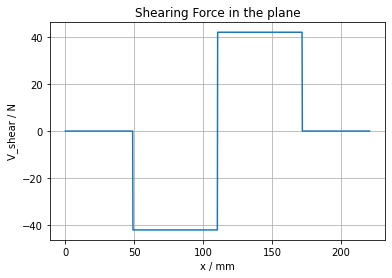

Force in kN:  [0, -0.04191672676851573, 0.08383345353703146, -0.04191672676851573, 0]
Position relates to the left end in mm:  [  0.   49.  110.5 172.  221. ]
Bending Mending is returned in [N.m]


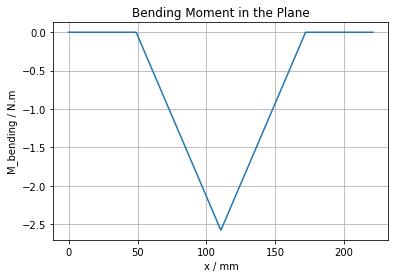

In [15]:
list_section = [0, AB, BC, CD, DE]
force_section = [0, -R_Bearing, R_spur, -R_Bearing, 0]

V_inPlane = show_ShearingForce(total_length = AE, n_section = 4, list_section = list_section,
                       force_section = force_section)

M_inPlane = show_BendingMoment(total_length = AE, n_section = 4, list_section = list_section,
                       force_section = force_section)

### (c) Stress Concentration

From Figure A-15-9 & A-15-10, and filler r=1mm

In [16]:
Kts = 1.3
Kt = 1.8

In [22]:
V_max = max(abs(V_inPlane))       # N
M_max = max(abs(M_inPlane))       # Nm

# at the max shearing force position (V)
D_shaft_mm = Bore_spurgear      # mm

### (d) Some Key/Basic Values

##### Tao_1 by Shearing Force

In [23]:
Tao_1 = 16 * V_max / (3 * pi * pow(D_shaft_mm,2))       # MPa
print('Tao_1 by Shearing Force is {} MPa'.format(round(Tao_1,4)))

Tao_1 by Shearing Force is 0.1779 MPa


##### Tao_2 by shaft rotation

In [24]:
T = Torque_spur_Nm # N.m
r = Bore_spurgear/2      # mm
Tao_2 = (2*T)/(pi * pow(r,3))  # MPa
print('Tao_2 by Shaft Rotation is {} MPa'.format(round(Tao_2,4)))

Tao_2 by Shaft Rotation is 0.0032 MPa


#### Tao_max, min and mean for dynamic loading

In [25]:
Tao_max = Tao_1 + Tao_2
Tao_mim = Tao_1 - Tao_2
Tao_mean = Tao_1

In [28]:
Tao_m = Tao_mean
Tao_a = Tao_2
text = 'Combine the effects of Shaft Rotation and Shearing Force: \n'
text += 'Tao_m is {} MPa dominated by Shearing Force \n'.format(round(Tao_m,4))
text += 'Tao_a is {} MPa representing the effect of rotation \n'.format(round(Tao_a,4))
print(text)

Combine the effects of Shaft Rotation and Shearing Force: 
Tao_m is 0.1779 MPa dominated by Shearing Force 
Tao_a is 0.0032 MPa representing the effect of rotation 



#### Sigma_max by max Bending Moment

In [30]:
Sigma_max = (32 * M_max*1e3) / (pi * pow(D_shaft_mm,3))  # MPa
print('Sigma_max by Bending Moment is {} MPa'.format(round(Sigma_max,4)))

Sigma_max by Bending Moment is 3.2764 MPa


## Static Analysis

## Dynamic load Analysis -- Goodman's Law

Caused by the fluctuation of loading

In [31]:
Tao_m = Tao_mean
Tao_a = Tao_2

Sigma_m = Sigma_max